In [309]:
# Importing the libraries

import pandas as pd
import datetime

# for visualizations

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)

In [310]:
# Importing the dataset. Checking the names of columns.

df = pd.read_csv('/Users/kwaku_britain/Downloads/Violent_Crime_by_County_1975_to_2016.csv')
X = df.loc[:, ["PROPERTY CRIME TOTALS", "VIOLENT CRIME TOTAL", "GRAND TOTAL"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   JURISDICTION                                           1008 non-null   object 
 1   YEAR                                                   1008 non-null   object 
 2   POPULATION                                             1008 non-null   int64  
 3   MURDER                                                 1008 non-null   int64  
 4   RAPE                                                   1008 non-null   int64  
 5   ROBBERY                                                1008 non-null   int64  
 6   AGG. ASSAULT                                           1008 non-null   int64  
 7   B & E                                                  1008 non-null   int64  
 8   LARCENY THEFT                                   

In [311]:
# Number of Crimes.

df.shape

(1008, 38)

In [312]:
df.head()


,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,01/01/1975 12:00:00 AM,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,01/01/1976 12:00:00 AM,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,01/01/1977 12:00:00 AM,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,01/01/1978 12:00:00 AM,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,01/01/1979 12:00:00 AM,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


In [313]:
# Returning the median number of murders

df['MURDER'].median()

3.0

In [314]:
# The median number of rapes in Maryland.

df['RAPE'].median()


20.0

In [315]:
# The median number of robbery in Maryland.

df['ROBBERY'].median()


47.0

In [316]:
# The median number of aggravated assault in Maryland.

df['AGG. ASSAULT'].median()

260.5

In [317]:
# The median number of B & E in Maryland.

df['B & E'].median()


641.5

In [318]:
# The median number of larceny theft in Maryland.

df['LARCENY THEFT'].median()


1837.0

In [319]:
# The median number of violent crimes in Maryland.

df['VIOLENT CRIME TOTAL'].median()


327.5

In [320]:
# The median number of property crimes in Maryland.

df['PROPERTY CRIME TOTALS'].median()


2602.5

In [321]:
# Returning the median value of the total crime. 

df['GRAND TOTAL'].median()

2937.0

In [322]:
# minimum number of violent crimes
df['VIOLENT CRIME TOTAL'].tail()

1003    186
1004    217
1005    190
1006    145
1007    152
Name: VIOLENT CRIME TOTAL, dtype: int64

In [323]:
# minimum number of property crimes
df['PROPERTY CRIME TOTALS'].tail(3)

1005    2237
1006    1863
1007    1835
Name: PROPERTY CRIME TOTALS, dtype: int64

In [324]:
# A sum of minimum number of general crimes in Maryland
df['GRAND TOTAL'].tail()

1003    2402
1004    2333
1005    2427
1006    2008
1007    1987
Name: GRAND TOTAL, dtype: int64

In [325]:
df['VIOLENT CRIME TOTAL'].head()

0    142
1     87
2    127
3    102
4    110
Name: VIOLENT CRIME TOTAL, dtype: int64

In [326]:
df['PROPERTY CRIME TOTALS'].head()

0    2187
1    2038
2    2084
3    2029
4    2212
Name: PROPERTY CRIME TOTALS, dtype: int64

In [327]:
df['GRAND TOTAL'].value_counts().head(3)

829     3
610     3
1025    3
Name: GRAND TOTAL, dtype: int64

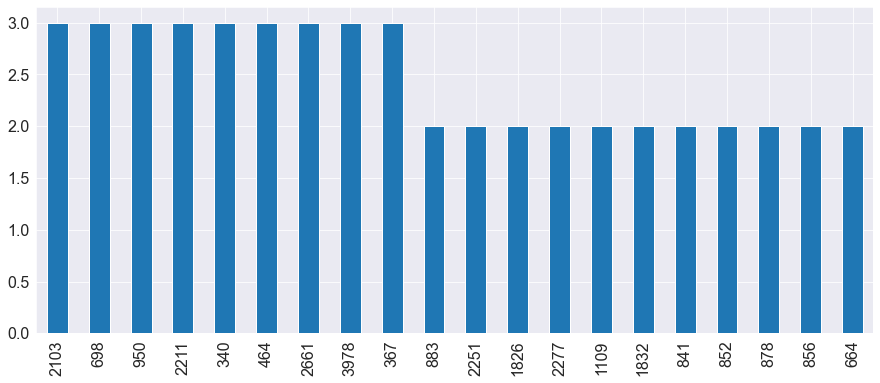

In [328]:
# Bar plot with stats for 20 highest property crimes. 

pcrime_num = df['PROPERTY CRIME TOTALS'].value_counts().head(20).plot.bar(figsize=(15, 6))


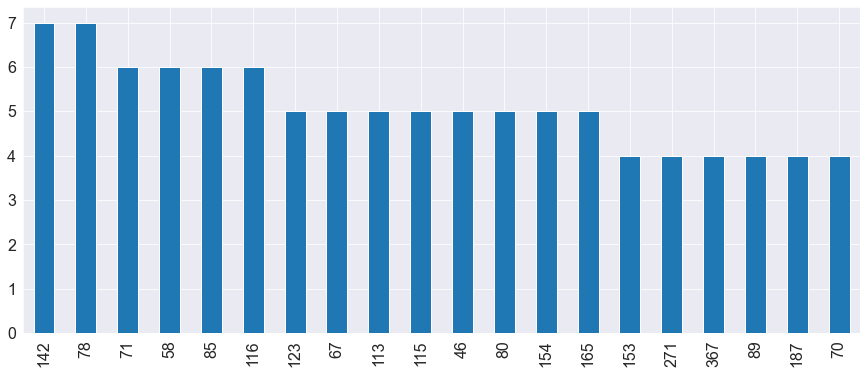

In [329]:
# Bar plot with stats for 20 highest violent crimes. 

vcrime_num = df['VIOLENT CRIME TOTAL'].value_counts().head(20).plot.bar(figsize=(15, 6))



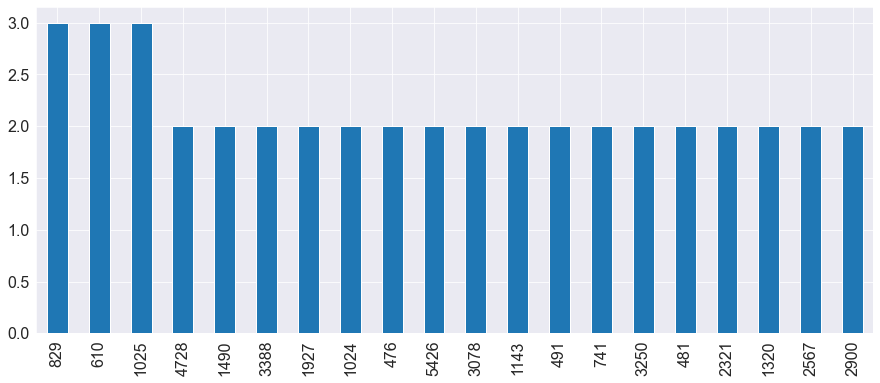

In [330]:
# Bar plot with stats for 20 highest maximum of all crimes. 

crime_num = df['GRAND TOTAL'].value_counts().head(20).plot.bar(figsize=(15, 6))



In [331]:
pcrime_num = df['PROPERTY CRIME TOTALS'].value_counts()
pcrime_pct = df['PROPERTY CRIME TOTALS'].value_counts(1) * 100
pd.DataFrame({'Property Crime Total' : pcrime_num, 'Percent' : pcrime_pct}). round(2)

,Property Crime Total,Percent
2103,3,0.3
698,3,0.3
950,3,0.3
2211,3,0.3
340,3,0.3
...,...,...
2705,1,0.1
658,1,0.1
2708,1,0.1
6805,1,0.1


In [332]:
vcrime_num = df['VIOLENT CRIME TOTAL'].value_counts()
vcrime_pct = df['VIOLENT CRIME TOTAL'].value_counts(1) * 100
pd.DataFrame({'Violent Crime Total' : vcrime_num, 'Percent' : vcrime_pct}). round(2)

,Violent Crime Total,Percent
142,7,0.69
78,7,0.69
71,6,0.60
58,6,0.60
85,6,0.60
...,...,...
364,1,0.10
341,1,0.10
15628,1,0.10
357,1,0.10


In [333]:
crime_num = df['GRAND TOTAL'].value_counts()
crime_pct = df['GRAND TOTAL'].value_counts(1) * 100
pd.DataFrame({'GRAND TOTAL' : crime_num, 'Percent' : crime_pct}). round(2)

,GRAND TOTAL,Percent
829,3,0.3
610,3,0.3
1025,3,0.3
4728,2,0.2
1490,2,0.2
...,...,...
2704,1,0.1
657,1,0.1
2626,1,0.1
662,1,0.1


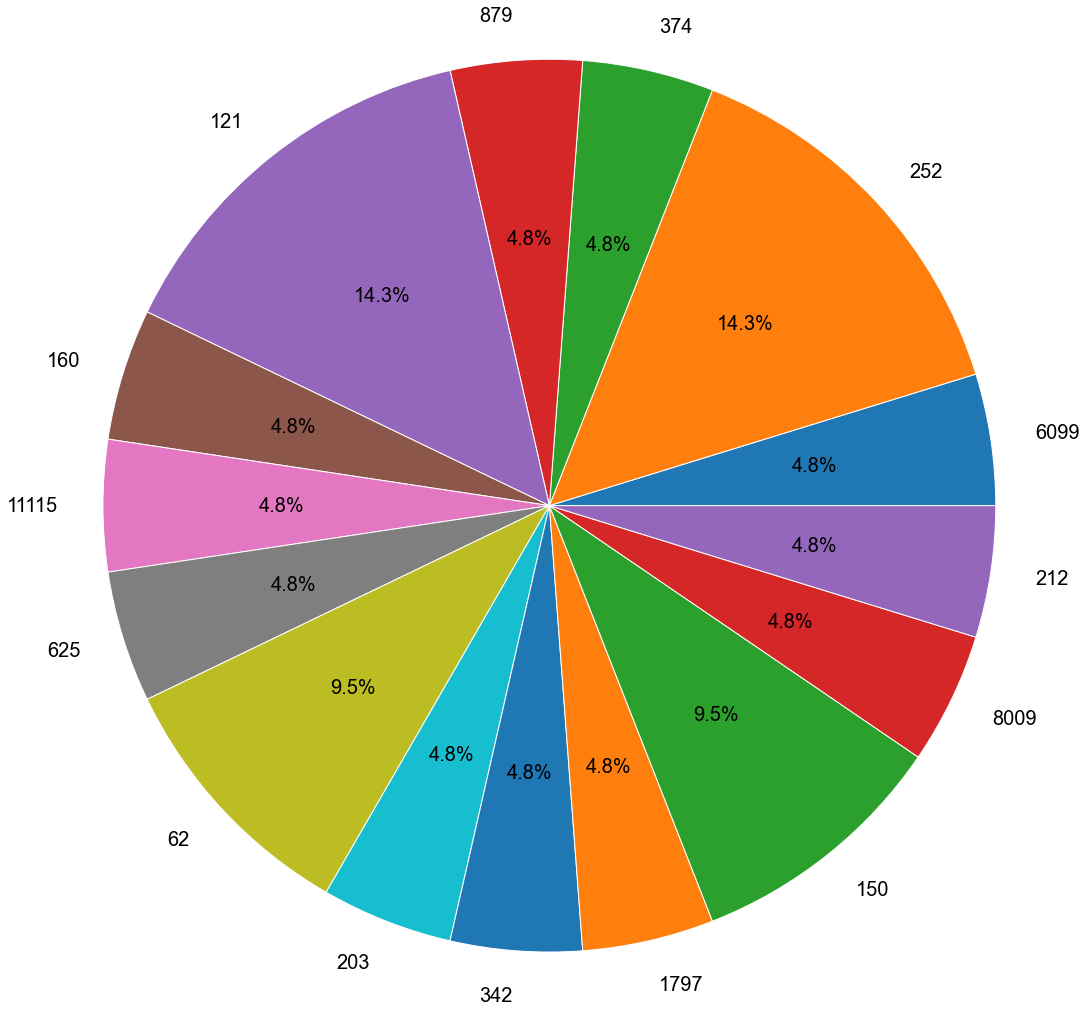

In [334]:
# Return pie plot with cut of a sample of total violent crime.

plt.rcParams.update({'font.size': 20})
vcrime_num = df['VIOLENT CRIME TOTAL']. value_counts(
).sample(n = 15).plot.pie(radius=4, autopct='%2.1f%%', 
                          textprops=dict(color="black"))

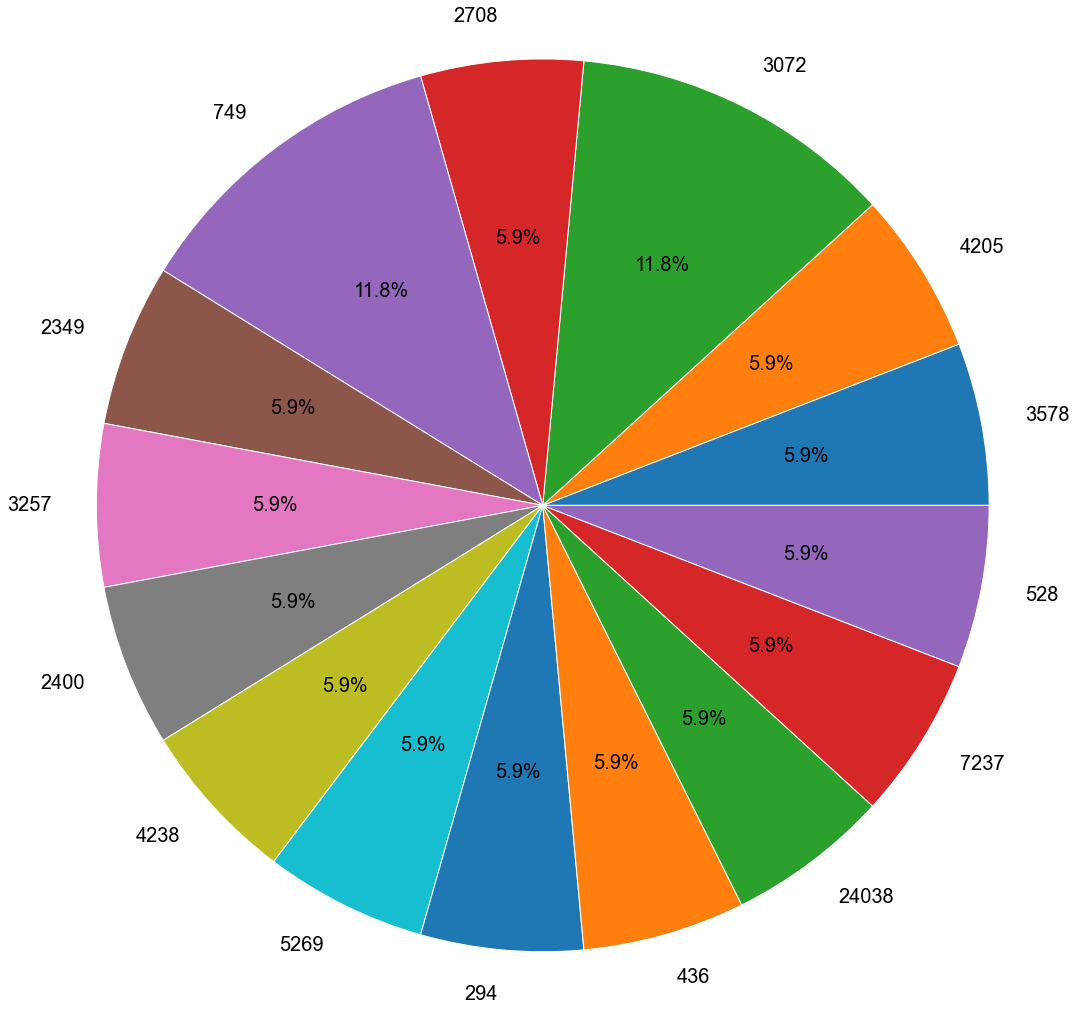

In [335]:
# Return pie plot with cut of a sample total property crime.

plt.rcParams.update({'font.size': 20})
pcrime_num = df['PROPERTY CRIME TOTALS']. value_counts(
).sample(n = 15).plot.pie(radius=4, autopct='%2.1f%%', 
                          textprops=dict(color="black"))

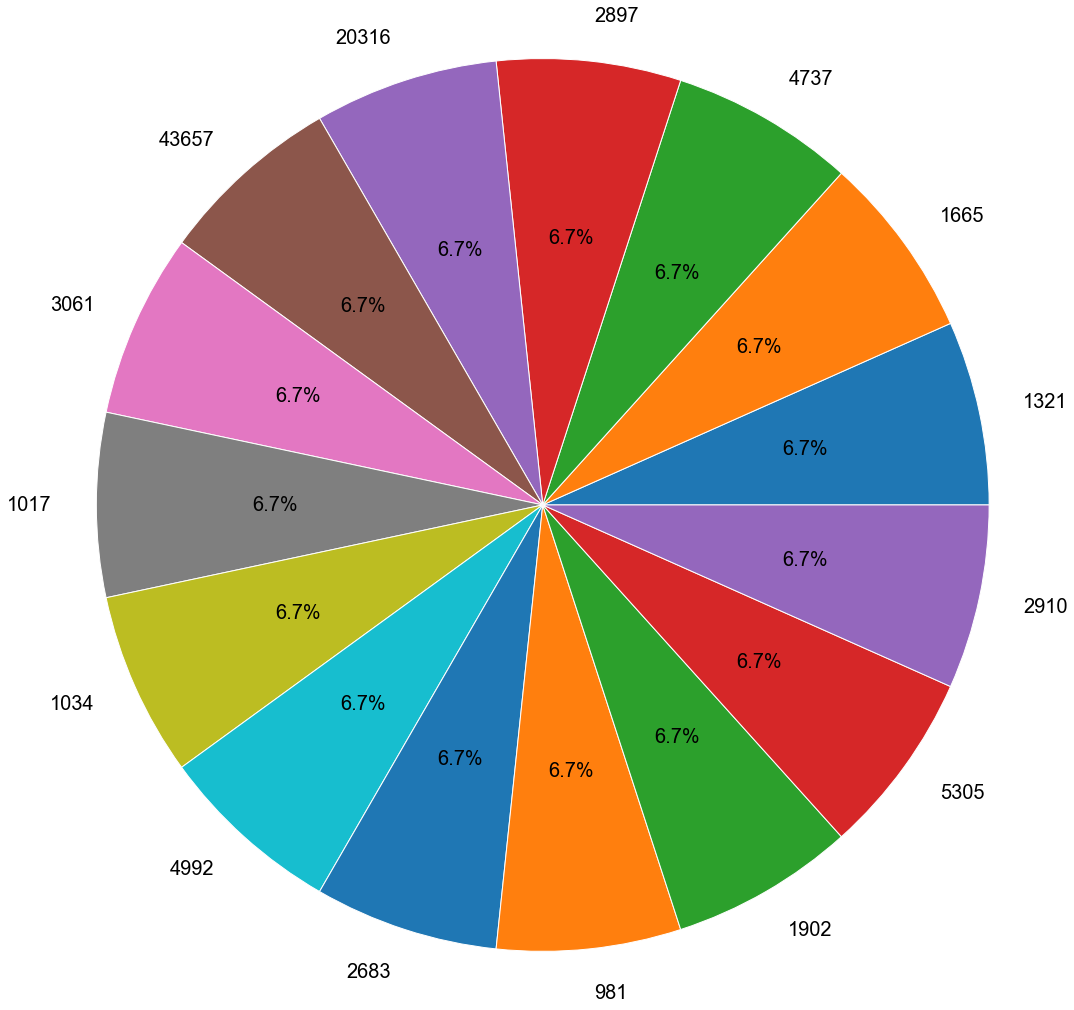

In [336]:
# Return pie plot with cut of total crime.

plt.rcParams.update({'font.size': 20})
crime_num = df['GRAND TOTAL']. value_counts(
).sample(n = 15).plot.pie(radius=4, autopct='%2.1f%%', 
                          textprops=dict(color="black"))

<AxesSubplot:>

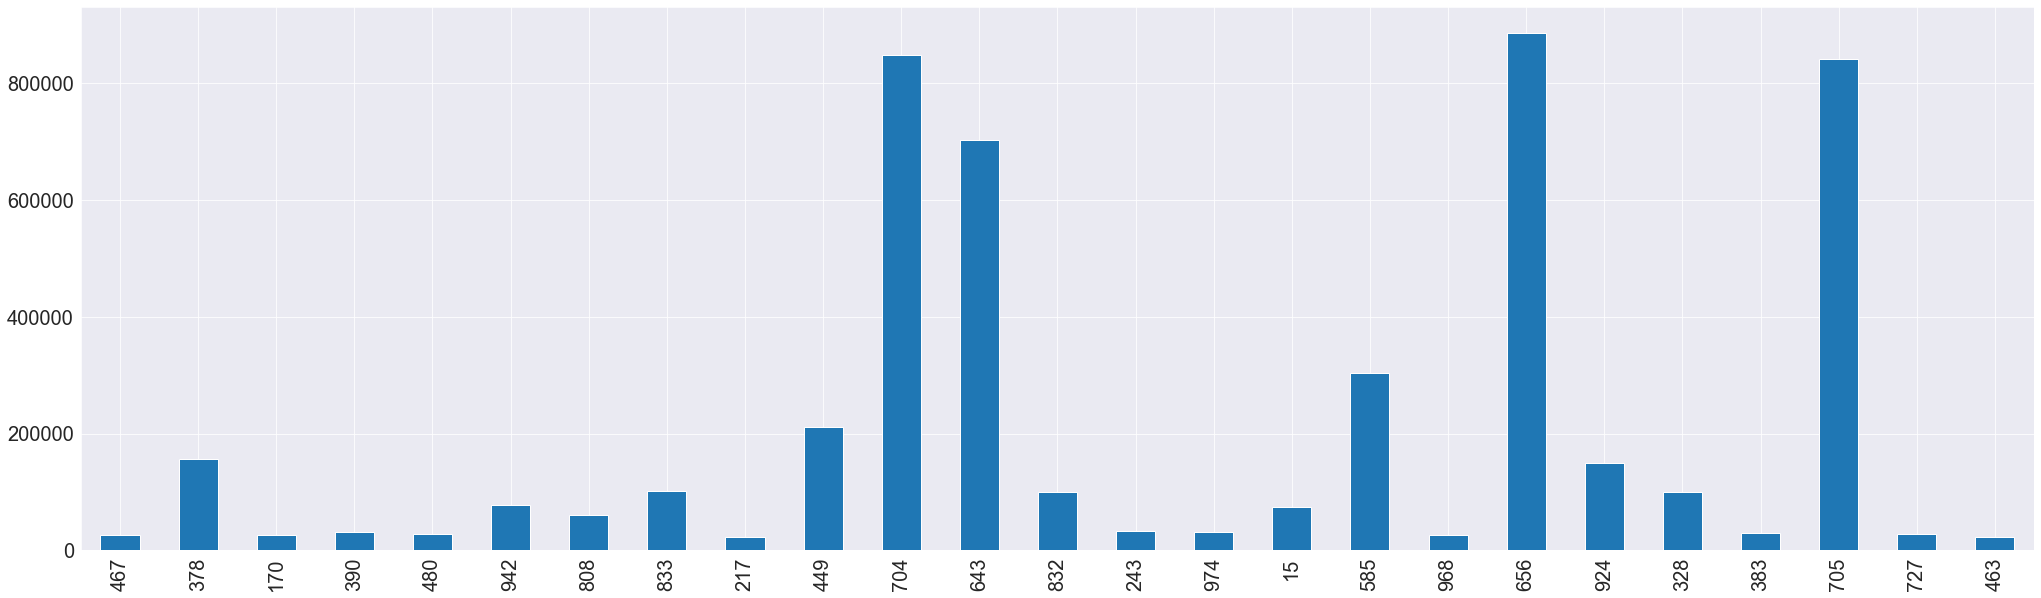

In [337]:
# Dataframe with total property crime and returning on the bar plot to find out which 
# population(randomly) are most dangerous with stats  

pcrime = df['JURISDICTION'] == 'PROPERTY CRIME TOTALS'
df['POPULATION'].sample(n = 25).plot.bar(figsize=(35, 10))

<AxesSubplot:>

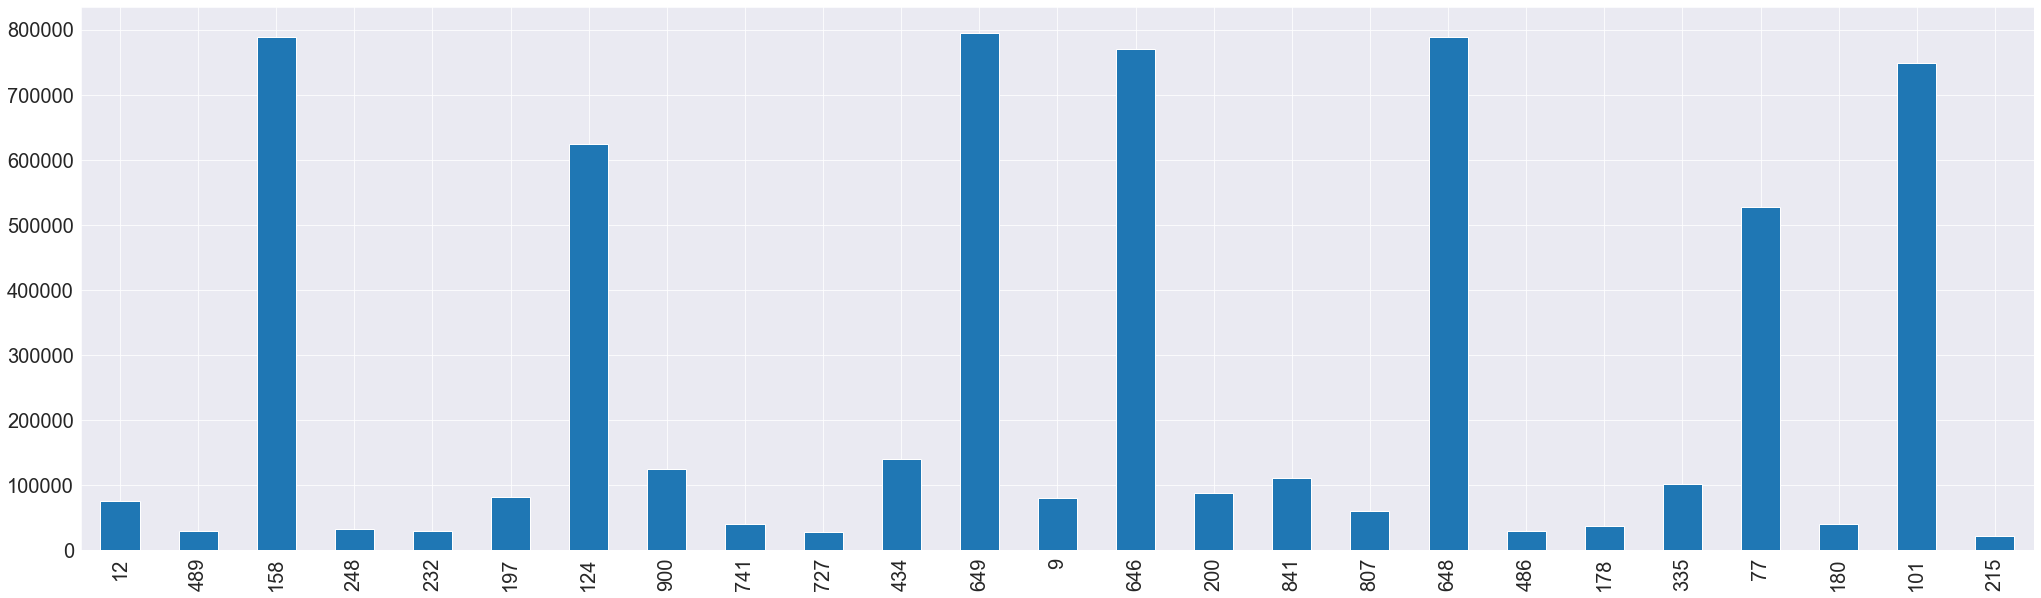

In [338]:
# Dataframe with total violent crime and returning on the bar plot to find out which 
# population(randomly) are most dangerous with stats  


vcrime = df['JURISDICTION'] == 'VIOLENT CRIME TOTAL'
df['POPULATION'].sample(n = 25).plot.bar(figsize=(35, 10))

<AxesSubplot:>

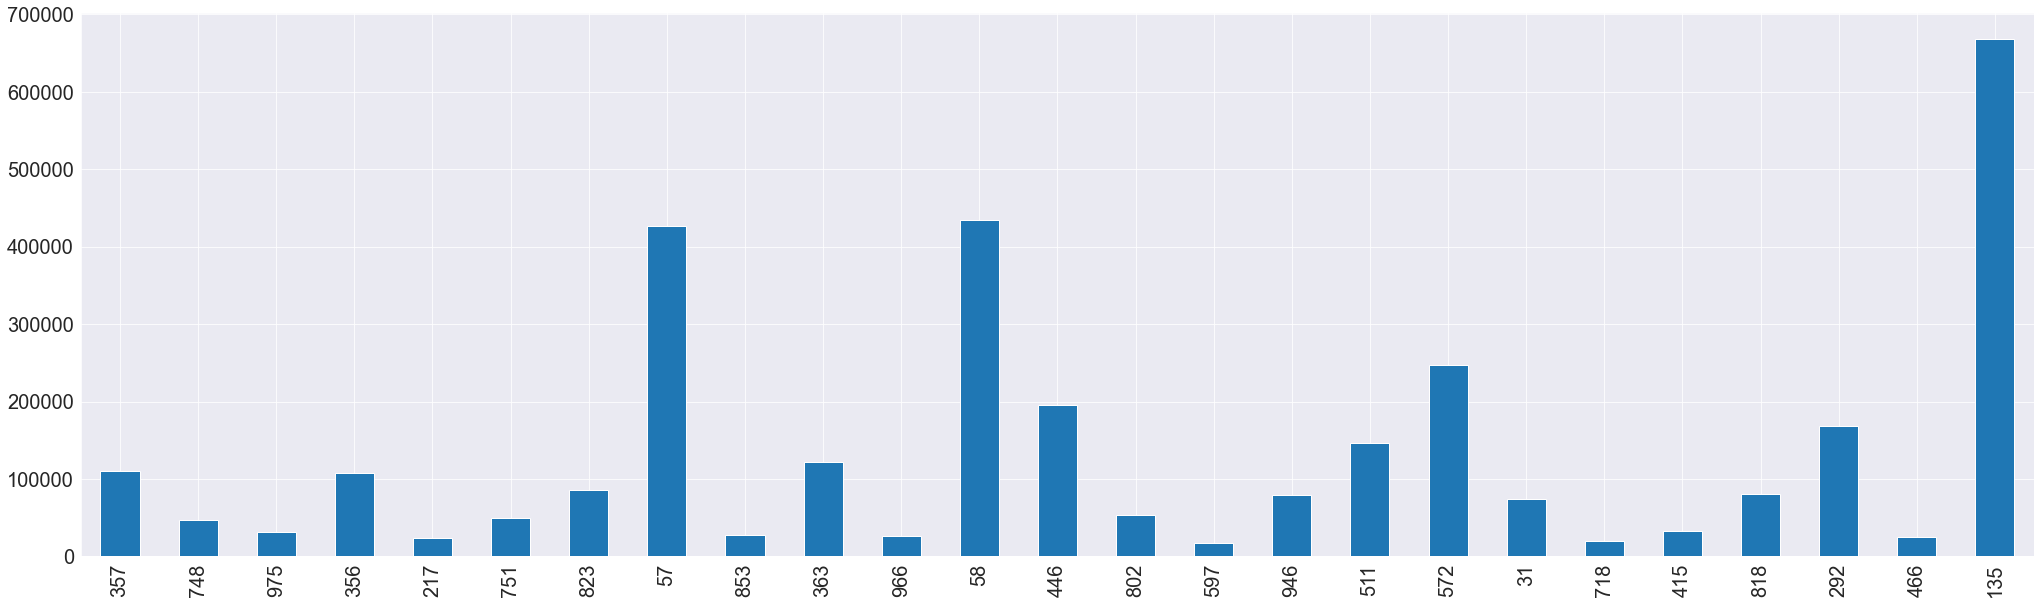

In [339]:
# Dataframe with total crime and returning on the bar plot to find out which 
# population(randomly) are most dangerous with stats 

crime = df['JURISDICTION'] == 'GRAND TOTAL'
df['POPULATION'].sample(n = 25).plot.bar(figsize=(35, 10))

In [340]:
df = df[pd.notnull(df['VIOLENT CRIME TOTAL'])]

In [341]:
df = df[pd.notnull(df['PROPERTY CRIME TOTALS'])]

In [342]:
df.shape

(1008, 38)

In [343]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [344]:
df = folium.Map(location = [39.0458, -76.6413], zoom_start = 14, 
                tiles = 'openstreetmap')
df

In [345]:
sns.relplot( x = 'POPULATION', y = 'PROPERTY CRIME TOTALS', hue = 'JURISDICTION', data = df, height = 9,);

ValueError: Could not interpret value `POPULATION` for parameter `x`

In [346]:
sns.relplot( x = 'POPULATION', y = 'VIOLENT CRIME TOTAL', hue = 'JURISDICTION', data = df, height = 9,);

ValueError: Could not interpret value `POPULATION` for parameter `x`

In [303]:
sns.relplot( x = 'POPULATION', y = 'GRAND TOTAL', hue = 'JURISDICTION', data = df, height = 9,);

ValueError: Could not interpret value `POPULATION` for parameter `x`

In [304]:
sns.relplot( x = 'POPULATION', y = 'VIOLENT CRIME TOTAL', 
            hue = 'YEAR', data = df, height = 9,);

ValueError: Could not interpret value `POPULATION` for parameter `x`

In [305]:
sns.relplot( x = 'POPULATION', y = 'PROPERTY CRIME TOTALS', 
            hue = 'YEAR', data = df, height = 9,);

ValueError: Could not interpret value `POPULATION` for parameter `x`

In [306]:
sns.relplot( x = 'POPULATION', y = 'GRAND TOTAL', 
            hue = 'YEAR', data = df, height = 12,);

ValueError: Could not interpret value `POPULATION` for parameter `x`

In [307]:
df['JURISDICTION'].fillna(df['JURISDICTION'].mode()[0], inplace = True)

df.isnull().any().any()

TypeError: 'Map' object is not subscriptable